In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
V_cut = 700

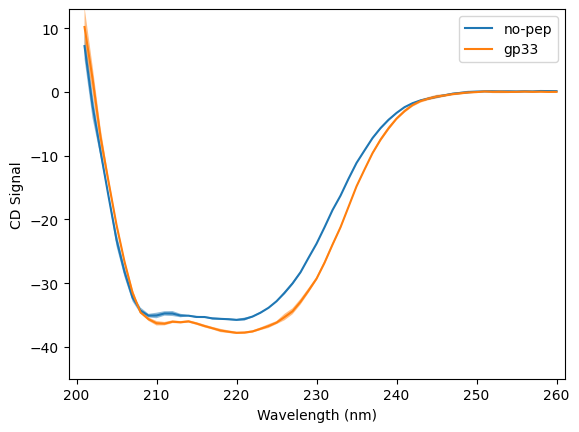

In [49]:
for pep in ['no-pep','gp33']:
    
    pooled_CD = []
    pooled_V = []
    
    for rep in range(1,4):
        data = pd.read_csv(f'initial/{pep}_{rep}.csv',skiprows=lambda x: (x<20) or (x>90),
                           names=['wavelength','CD','voltage'])
        
        pooled_CD.append(data['CD'].values)
        pooled_V.append(data['voltage'].values)
    
    pooled_CD = np.stack(pooled_CD,axis=0)
    pooled_V = np.stack(pooled_V,axis=0)
    
    pooled_CD[pooled_V > V_cut] = np.nan
    good_idx = np.all(pooled_V <= V_cut,axis=0)
    
    std = np.std(pooled_CD,axis=0)
    avg = np.mean(pooled_CD,axis=0)
    
    plt.plot(data['wavelength'],avg,label=pep)
    plt.fill_between(data['wavelength'],avg-std,avg+std,alpha=0.5)
    
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.xlim([199,261])
plt.ylim([-45,13])
plt.ylabel('CD Signal')
plt.savefig('Initial_Spectra.png',dpi=300)

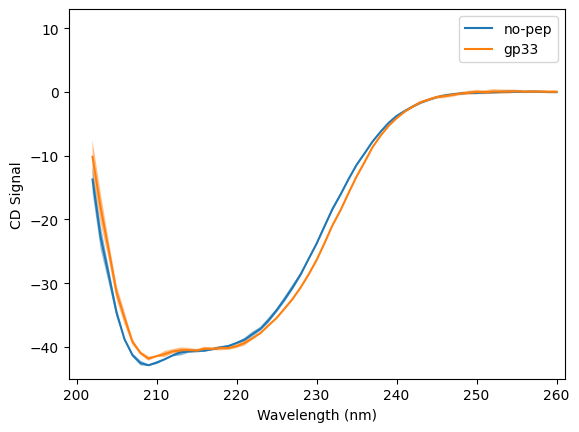

In [48]:
for pep in ['no-pep','gp33']:
    
    pooled_CD = []
    pooled_V = []
    
    for rep in range(1,4):
        data = pd.read_csv(f'final/{pep}_{rep}.csv',skiprows=lambda x: (x<20) or (x>90),
                           names=['wavelength','CD','voltage'])
        
        pooled_CD.append(data['CD'].values)
        pooled_V.append(data['voltage'].values)
    
    pooled_CD = np.stack(pooled_CD,axis=0)
    pooled_V = np.stack(pooled_V,axis=0)
    
    pooled_CD[pooled_V > V_cut] = np.nan
    good_idx = np.all(pooled_V <= V_cut,axis=0)
    
    std = np.std(pooled_CD,axis=0)
    avg = np.mean(pooled_CD,axis=0)
    
    plt.plot(data['wavelength'],avg,label=pep)
    plt.fill_between(data['wavelength'],avg-std,avg+std,alpha=0.5)
    
plt.legend()
plt.xlim([199,261])
plt.ylim([-45,13])
plt.xlabel('Wavelength (nm)')
plt.ylabel('CD Signal')
plt.savefig('Final_Spectra.png',dpi=300)

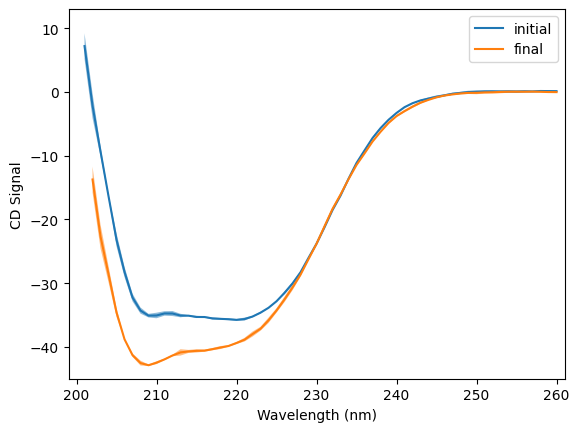

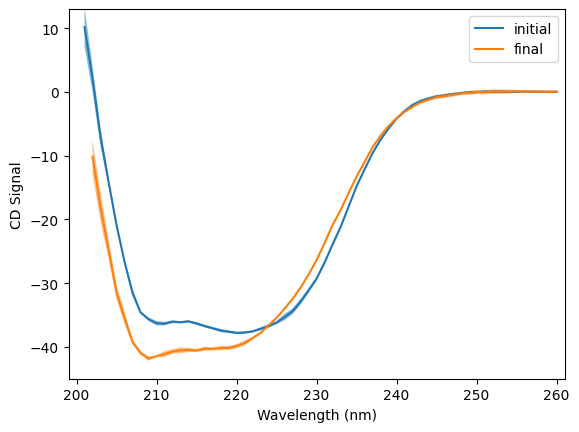

In [50]:
for pep in ['no-pep','gp33']:
    
    plt.figure()
    
    for step in ['initial','final']:
    
        pooled_CD = []
        pooled_V = []

        for rep in range(1,4):
            data = pd.read_csv(f'{step}/{pep}_{rep}.csv',skiprows=lambda x: (x<20) or (x>90),
                               names=['wavelength','CD','voltage'])

            pooled_CD.append(data['CD'].values)
            pooled_V.append(data['voltage'].values)

        pooled_CD = np.stack(pooled_CD,axis=0)
        pooled_V = np.stack(pooled_V,axis=0)

        pooled_CD[pooled_V > V_cut] = np.nan
        good_idx = np.all(pooled_V <= V_cut,axis=0)

        std = np.std(pooled_CD,axis=0)
        avg = np.mean(pooled_CD,axis=0)

        plt.plot(data['wavelength'],avg,label=step)
        plt.fill_between(data['wavelength'],avg-std,avg+std,alpha=0.5)

    plt.legend()
    plt.xlim([199,261])
    plt.ylim([-45,13])
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('CD Signal')
    plt.savefig(f'{pep}_before_and_after.png',dpi=300)

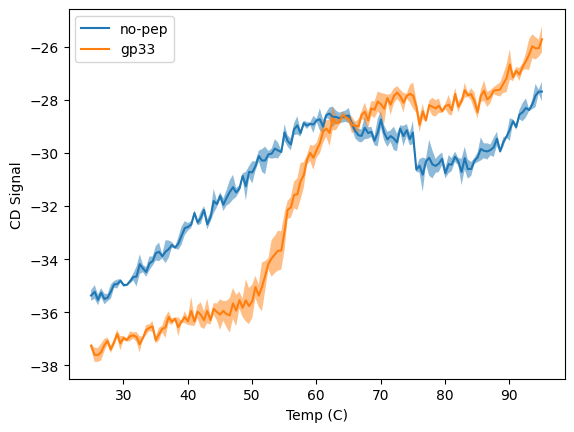

In [55]:
for pep in ['no-pep','gp33']:
    
    pooled_CD = []
    pooled_V = []
    pooled_T = []
    
    for rep in range(1,4):
        data = pd.read_csv(f'melting/{pep}_{rep}.csv',skiprows=lambda x: (x<15) or (x>155),
                           names=['temp','CD','voltage'])
        
        pooled_CD.append(data['CD'].values)
        pooled_V.append(data['voltage'].values)
        pooled_T.append(data['temp'].values)
    
    pooled_CD = np.stack(pooled_CD,axis=0)
    pooled_V = np.stack(pooled_V,axis=0)
    pooled_T = np.stack(pooled_T,axis=0)
    
    pooled_CD[pooled_V > V_cut] = np.nan
    
    std = np.std(pooled_CD,axis=0)
    avg = np.mean(pooled_CD,axis=0)
    
    plt.plot(data['temp'],avg,label=pep)
    plt.fill_between(data['temp'],avg-std,avg+std,alpha=0.5)
    
plt.legend()
plt.xlabel('Temp (C)')
plt.ylabel('CD Signal')
plt.savefig('melting_curves.png',dpi=300)

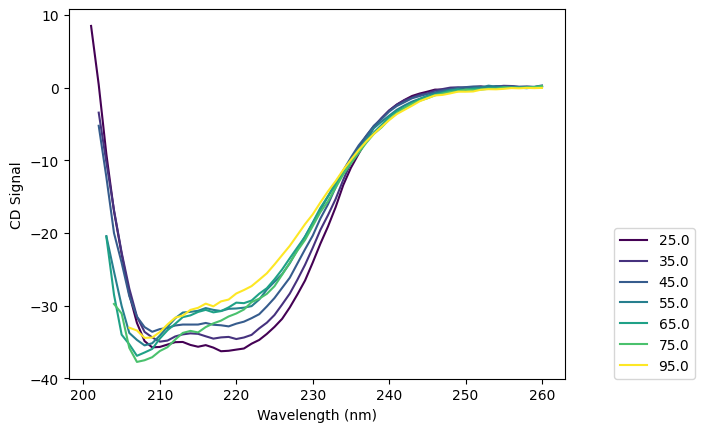

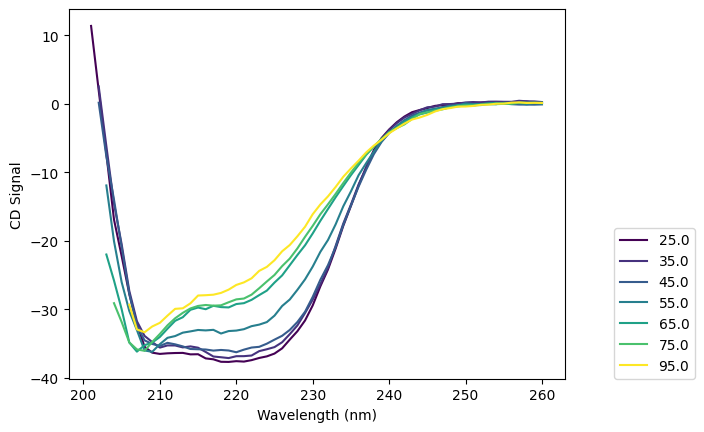

In [79]:
cmap = plt.get_cmap('viridis')

for pep in ['no-pep','gp33']:
    
    plt.figure()
    
    pooled_CD = []
    pooled_V = []
    
    for rep in range(1,4):
        
        CD = pd.read_csv(f'melting/{pep}_{rep}_curves.csv',skiprows=lambda x: (x<19) or (x>90))
        voltage = pd.read_csv(f'melting/{pep}_{rep}_curves.csv',skiprows=lambda x: (x<92))
        
        pooled_CD.append(CD.values[:,1:])
        pooled_V.append(voltage.values[:,1:])
        
    pooled_CD = np.stack(pooled_CD,axis=2)
    pooled_V = np.stack(pooled_V,axis=2)
    
    pooled_CD[pooled_V > V_cut] = np.nan
        
    for t,temp in enumerate(CD.columns[1:]):

        temp_round = np.round(float(temp),0)
        plt.plot(CD['Unnamed: 0'],np.mean(pooled_CD[:,t,:],1),label=temp_round,color=cmap((temp_round-25)/70))
        
    plt.legend(loc=[1.1,0])
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('CD Signal')
    plt.savefig(f'{pep}_Melting_Spectra.png',dpi=300,bbox_inches='tight')